# Linear Regression

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Data preprocessing
- I'll use the bike sharing dataset from UCI Machine Learning Repository.
- The dataset contains the hourly count of rental bikes between years 2017 and 2018 in the Capital Bikeshare system with the corresponding weather and seasonal information.
- First I should convert the data to a usable format, like change the holiday and functioning day  and holiday to 0 and 1
- Also I should convert the season and month to one-hot encoding, then I can use the data to train the model.

In [22]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
bike_data = pd.read_csv('./SeoulBikeData.csv').drop(["Date", "Holiday", "Seasons"], axis=1)

bike_data.columns = dataset_cols

# 3. Data Visualization
- I'll visualize the data to get a better understanding of the data.
- I used the scatter plot to visualize the relationship between the features and the label.

In [23]:
# for label in bike_data.columns[1:]:
#   plt.scatter(bike_data[label], bike_data["bike_count"])
#   plt.title(label)
#   plt.ylabel("Bike Count at Noon")
#   plt.xlabel(label)
#   plt.show()

# 3.1 Correlation

In [24]:
bike_data["functional"] = (bike_data["functional"] == "Yes").astype(int)
# bike_data = bike_data[bike_data["hour"] == 12]
bike_data = bike_data.drop(["hour", "wind", "visibility", "functional"], axis=1)
bike_data.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


# 2. Data Scaled
- I need scale the data before training the model. I'll use the min-max scaler to scale the data.

In [25]:
# We will standardize all the features except 'Rented Bike Count'
features_to_standardize = ["temp", "humidity", "dew_pt_temp", "radiation", "rain", "snow"]

# Standardize the features
for feature in features_to_standardize:
    mean = bike_data[feature].mean()
    std = bike_data[feature].std()
    bike_data[feature] = (bike_data[feature] - mean) / std
    
bike_data.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,-1.513871,-1.042423,-1.659510,-0.655094,-0.131792,-0.171881
1,204,-1.538986,-0.993313,-1.659510,-0.655094,-0.131792,-0.171881
2,173,-1.580845,-0.944203,-1.667167,-0.655094,-0.131792,-0.171881
3,107,-1.597589,-0.895093,-1.659510,-0.655094,-0.131792,-0.171881
4,78,-1.580845,-1.091533,-1.736077,-0.655094,-0.131792,-0.171881


# 4. Linear Regression
- In the class - LinearRegression, I'll implement the fit and predict methods.
- The fit method will train the model using gradient descent.

In [26]:
class LinearRegression:
    """
    Linear Regression class.
    :param learning_rate: The step length that will be taken when following the negative gradient during training.
    :param iterations: The number of iterations to train the model.
    :param w: The weights of the model.
    :param b: The bias of the model.
    :param cost_history: The cost history of the model which will be used to plot the cost over iterations.
    """

    def __init__(self, learning_rate, iterations):
        """
        Initializes the LinearRegression model with specified learning rate and number of iterations.
        :param learning_rate: The learning rate for the model.
        :param iterations: The number of iterations for which the model will be trained.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.b = None
        self.cost_history = []

    def _initialize_weights(self, n_features):
        """
        Initializes weights and bias to zeros.
        :param n_features: The number of features in the dataset.
        """
        self.w = np.zeros(n_features)
        self.b = 0

    def _compute_cost(self, predictions, y):
        """
        Computes the cost (mean squared error) between the predictions and the true values.
        :param predictions: The predicted values from the model.
        :param y: The actual target values.
        :return: The computed mean squared error.
        """
        cost = np.mean((predictions - y) ** 2) / 2
        return cost

    def _compute_gradients(self, X, y, predictions):
        """
        Computes the gradients of the cost function with respect to the model parameters.
        :param X: The input features.
        :param y: The actual target values.
        :param predictions: The predicted values from the model.
        :return: The gradients with respect to weights and bias.
        """
        n_samples = len(y)
        dw = np.dot(X.T, (predictions - y)) / n_samples
        db = np.sum(predictions - y) / n_samples
        return dw, db

    def _update_parameters(self, dw, db):
        """
        Updates the model parameters using the computed gradients.
        :param dw: The gradient with respect to weights.
        :param db: The gradient with respect to bias.
        """
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def fit(self, X, y):
        """
        Trains the Linear Regression model using gradient descent.
        :param X: The input features for training.
        :param y: The target values for training.
        """
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self._initialize_weights(n_features)

        # Gradient Descent
        for i in range(self.iterations):
            # Predictions
            predictions = self.predict(X)

            # Compute the cost
            cost = self._compute_cost(predictions, y)
            self.cost_history.append(cost)
            if i % 10000 == 0:
                print(cost)

            # Compute gradients
            dw, db = self._compute_gradients(X, y, predictions)

            # Update weights and bias
            self._update_parameters(dw, db)
        
        print({'weights': self.w, 'bias': self.b})

        return self

    def predict(self, X):
        """
        Makes predictions using the linear model.
        :param X: The input features for making predictions.
        :return: The predicted values.
        """
        return np.dot(X, self.w) + self.b


# 5. Train the model
- Now that I have implemented the LinearRegression class, I can train the model.
- I'll use 80% of the data for training and 20% for testing.
- Due the linear regression is regression but my data set is classification, so I need round the predictions to the nearest integer to simulate classification.

## 5.1 Classify the data

In [27]:
# Shuffle the data
bike_data = bike_data.sample(frac=1, random_state=42)

# Split the data
X = bike_data.drop('bike_count', axis=1).values
y = bike_data['bike_count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.2 Train the model

In [28]:
linear_regression_model = LinearRegression(0.1, 50000)
linear_regression_model.fit(X_train, y_train)

cost_history = linear_regression_model.cost_history

predictions = linear_regression_model.predict(X_test)

460024.17437214614
128576.04177740979
128576.03039855442
128576.0303977
128576.03039769996
{'weights': array([ 453.0281618 , -212.22421214,  -35.18979602,  -86.90404604,
        -63.85070024,   20.23298491]), 'bias': 701.9945501577948}


# 6. Evaluate the model
## 6.1 Calculate the mse of the model
MSE (Mean Squared Error) is calculated as follows:
$$
\[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]
$$
Where:

- $\( n \)$ is the number of samples.
- $\( y_i \)$ is the actual value.
- $\( \hat{y}_i \)$ is the predicted value.
- $\( (y_i - \hat{y}_i)^2 \)$ is the square of the difference between the actual and predicted values.


In [29]:
def mse(y_true, y_pred):
    """
    The mse function is used to compute the mse of the model.
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the mse of the model
    """
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

print(f"MSE: {mse(y_test, predictions):.2f}")

MSE: 236418.01


## 6.2 Visualize the results

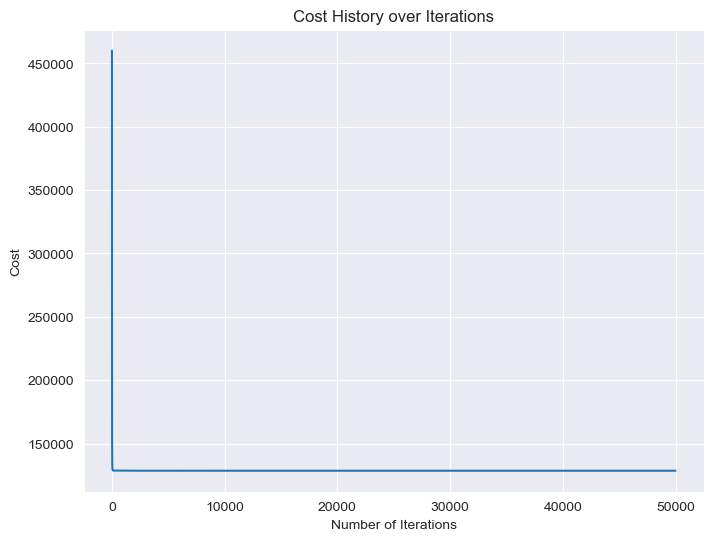

In [30]:
# Plot the cost history over iterations
plt.figure(figsize=(8, 6))
plt.plot(cost_history)
plt.title('Cost History over Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()